## Data Exploration and Preprocessing
Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# read file is named 'blogs_categories.csv'
df = pd.read_csv(r"C:\Users\Dell\Downloads\blogs.csv")


In [2]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [3]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [4]:
df.dtypes

Data      object
Labels    object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [6]:
#handling missing values 
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [7]:
# Creating the text_length column
df['text_length'] = df['Data'].apply(lambda x: len(x.split()))


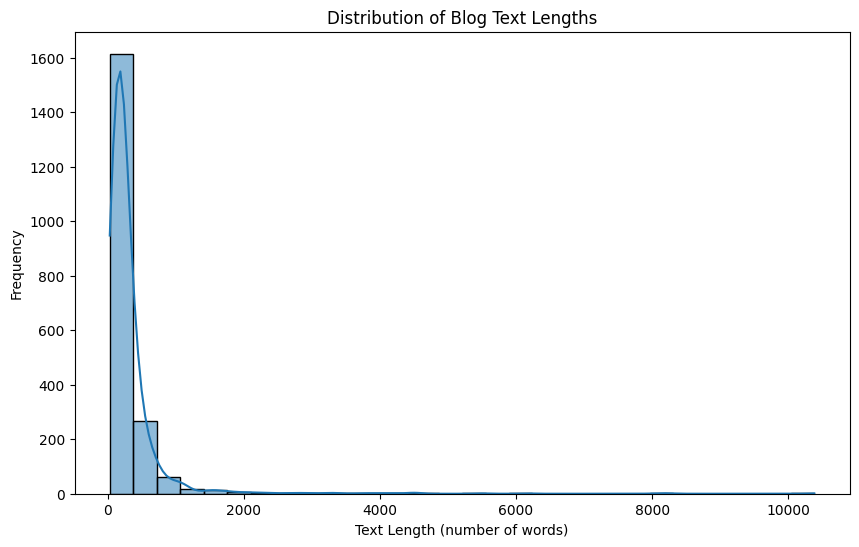

In [8]:
# Plotting the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Blog Text Lengths')
plt.xlabel('Text Length (number of words)')
plt.ylabel('Frequency')
plt.show()

In [10]:
!pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 320.0 kB/s eta 0:00:01
   ------ -------------------------------- 51.2/300.2 kB 435.7 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 653.6 kB/s eta 0:00:01
   ---------------------------- ----------- 215.0/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 215.0/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.1 MB/s eta 0:00:00


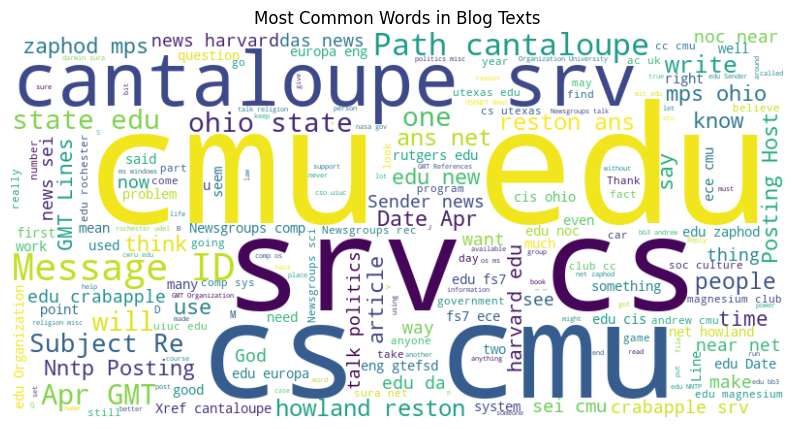

In [11]:
from wordcloud import WordCloud

# Combine all the blog texts into one string
all_text = ' '.join(df['Data'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Blog Texts')
plt.show()
     

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK data (stopwords and punkt)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


True

In [13]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a function to clean and preprocess the text
def preprocess_text(text, use_stemming=True, use_lemmatization=True):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Apply stemming or lemmatization
    if use_stemming:
        words = [stemmer.stem(word) for word in words]
    if use_lemmatization:
        words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply the preprocessing function to the Data column
df['cleaned_text'] = df['Data'].apply(preprocess_text)
     

In [14]:
df.head()

,Data,Labels,text_length,cleaned_text
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,910,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,163,newsgroup altath path cantaloupesrvcscmueducra...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,450,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,2732,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,438,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned_text column to TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Display the shape of the TF-IDF features matrix
print("Shape of TF-IDF features matrix:", tfidf_features.shape)
     

Shape of TF-IDF features matrix: (2000, 47412)


## Naive Bayes Model for Text Classification
    split the data into training and testing

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['Labels'], test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 47412)
Shape of X_test: (400, 47412)
Shape of y_train: (1600,)
Shape of y_test: (400,)


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.815
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.94      0.67        18
           comp.graphics       0.67      0.89      0.76        18
 comp.os.ms-windows.misc       0.79      0.86      0.83        22
comp.sys.ibm.pc.hardware       0.86      0.72      0.78        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.72      0.84        25
            misc.forsale       1.00      0.56      0.71        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.90      1.00      0.95        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.65      0.69      0.67        16
                 sci.med       0.88 

In [18]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.815


### Sentiment Analysis
Choose a suitable library or method for performing sentiment analysis on the blog post texts.

In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on a sample text
sample_text = "This blog post is really informative and helpful."
scores = sid.polarity_scores(sample_text)

# Print the sentiment scores
print("Sentiment Scores:")
print(scores)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


Sentiment Scores:
{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.4703}


In [20]:
##Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

In [21]:
# Function to categorize sentiment
def categorize_sentiment(text):
    # Perform sentiment analysis
    scores = sid.polarity_scores(text)
    # Classify sentiment based on compound score
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the Data column
df['Sentiment'] = df['Data'].apply(categorize_sentiment)

# Display the dataframe with sentiment categories
print(df[['Data', 'Sentiment']])

                                                   Data Sentiment
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Negative
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Positive
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Negative
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Negative
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive
...                                                 ...       ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  Positive
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  Positive
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  Negative

[2000 rows x 2 columns]


Examine the distribution of sentiments across different categories and summarize your findings.

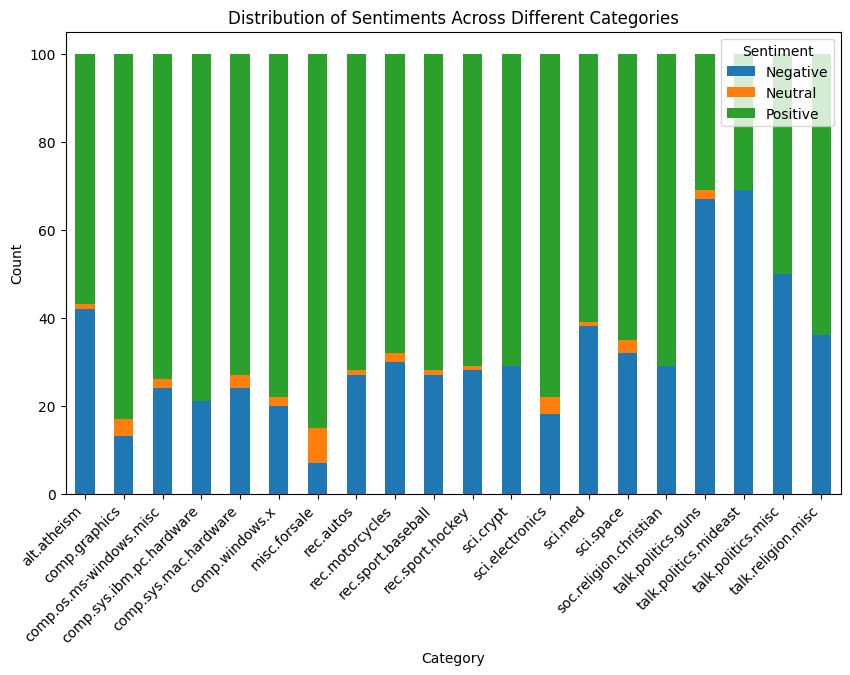

In [22]:
# Group by category and sentiment, and count occurrences
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)

# Plot the distribution of sentiments across different categories
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Sentiments Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

### Evaluation
Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

In [23]:
from sklearn.metrics import classification_report

# Evaluate the performance of the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.94      0.67        18
           comp.graphics       0.67      0.89      0.76        18
 comp.os.ms-windows.misc       0.79      0.86      0.83        22
comp.sys.ibm.pc.hardware       0.86      0.72      0.78        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.72      0.84        25
            misc.forsale       1.00      0.56      0.71        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.90      1.00      0.95        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.78      0.95      0.86        19
         sci.electronics       0.65      0.69      0.67        16
                 sci.med       0.88      0.88      0